In [1]:
# Library untuk dataframe dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# Import library untuk Clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_excel('Kompetitorv1.xlsx', 'PTO_SEP20-FEB21')

In [3]:
df

,Urut,No,Produk,Exporter,Sum_Of_Net_Weight_Kg,FOB_Value_USD,FOB_Net_Weight,Importer,Destination_Country,Description
0,1,2020-09-04 08:00:00,PATCHOULI OIL,PT.FIRMENICH INDONESIA,1260.0,74041.00,58.762698,FIRMENICH AROMATICS PRODUCTION (INDIA) PVT. LTD.,INDIA,PATCHOULI EO 970905 (ESSENTIAL OIL FOR MFG OF ...
1,2,2020-09-07 08:00:00,PATCHOULI OIL,KTRADE EXPORTS PTE. LTD.,2000.0,101000.00,50.500000,ADITI INTERNATIONAL,INDIA,PATCHOULI OIL [ INDIA-INDONESIA FTA CERT.NO: 0...
2,4,2020-09-07 08:00:00,PATCHOULI OIL,PT.MIGNON SISTA INTERNATIONAL,200.0,9980.00,49.900000,VIGIROM PRIVATE LIMITED,INDIA,PATCHOULI OIL (LOT # PT012001)
3,5,2020-09-12 08:00:00,PATCHOULI OIL,PT.VAN AROMA,1000.0,55000.00,55.000000,AQUILA ORGANICS PVT.LTD.,INDIA,OIL PATCHOULI PTK RED BARREL ( ASEAN-INDIA FRE...
4,6,2020-09-15 08:00:00,PATCHOULI OIL,PT.INDOWANGI NUSAJAYA,4000.0,212800.00,53.200000,GIVAUDAN (INDIA) PRIVATE LIMITED,INDIA,PATCHOULI OIL (FOR USE IN FRAGRANCE OF SOAPS &...
...,...,...,...,...,...,...,...,...,...,...
77,79,2021-02-19 08:00:00,PATCHOULI OIL,HALDIN PACIFIC SEMESTA,1000.0,53740.50,53.740500,"MANE INDIA PVT LTD.,",INDIA,PATCHOULI OIL LIGHT10000366
78,80,2021-02-19 08:00:00,PATCHOULI OIL,INDOWANGI NUSA JAYA,14000.0,727160.00,51.940000,GIVAUDAN (INDIA) PVT LTD.,INDIA,PATCHOULI OIL (GVD PO:4502114881CHENNAI2 - 71)
79,81,2021-02-19 08:00:00,PATCHOULI OIL,VAN AROMA,6000.0,309653.33,51.608888,IMPERIAL FRAGRANCES & FLAVOURS PVT. LTD,INDIA,PATCHOULI OIL
80,82,2021-02-23 08:00:00,PATCHOULI OIL,INDESSO AROMA,1000.0,54430.00,54.430000,PATIL PARIMALA WORKS,INDIA,PATCHOULI PUREPO : 1470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Urut                  82 non-null     int64         
 1   No                    82 non-null     datetime64[ns]
 2   Produk                82 non-null     object        
 3   Exporter              82 non-null     object        
 4   Sum_Of_Net_Weight_Kg  82 non-null     float64       
 5   FOB_Value_USD         82 non-null     float64       
 6   FOB_Net_Weight        82 non-null     float64       
 7   Importer              82 non-null     object        
 8   Destination_Country   82 non-null     object        
 9   Description           82 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 6.5+ KB


In [5]:
df = df.dropna()
df.shape

(82, 10)

In [6]:
df['Importer'] = df.Importer.astype(str)

In [7]:
start_date = pd.to_datetime('2020-9-1')
end_date = pd.to_datetime('2021-3-1')
res = df[df['No'].between(start_date, end_date)]
print(res)


    Urut                  No         Produk                       Exporter  \
0      1 2020-09-04 08:00:00  PATCHOULI OIL         PT.FIRMENICH INDONESIA   
1      2 2020-09-07 08:00:00  PATCHOULI OIL       KTRADE EXPORTS PTE. LTD.   
2      4 2020-09-07 08:00:00  PATCHOULI OIL  PT.MIGNON SISTA INTERNATIONAL   
3      5 2020-09-12 08:00:00  PATCHOULI OIL                   PT.VAN AROMA   
4      6 2020-09-15 08:00:00  PATCHOULI OIL          PT.INDOWANGI NUSAJAYA   
..   ...                 ...            ...                            ...   
77    79 2021-02-19 08:00:00  PATCHOULI OIL         HALDIN PACIFIC SEMESTA   
78    80 2021-02-19 08:00:00  PATCHOULI OIL            INDOWANGI NUSA JAYA   
79    81 2021-02-19 08:00:00  PATCHOULI OIL                      VAN AROMA   
80    82 2021-02-23 08:00:00  PATCHOULI OIL                  INDESSO AROMA   
81    83 2021-02-27 08:00:00  PATCHOULI OIL         PRIMA TUNGGAL JAVALAND   

    Sum_Of_Net_Weight_Kg  FOB_Value_USD  FOB_Net_Weight  \
0   

In [8]:
# Membuat atribut baru : TotalValue
# df['TotalValue'] = df['Sum_Of_Net_Weight_Kg']*df['FOB_Net_Weight']
rfm_m = res.groupby('Importer')['Sum_Of_Net_Weight_Kg'].sum()
rfm_m = rfm_m.reset_index()
rfm_m

,Importer,Sum_Of_Net_Weight_Kg
0,ADITI INTERNATIONAL,7000.0
1,AQUILA ORGANICS PVT.LTD.,1000.0
2,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LIMITED,9000.0
3,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LTD.,4000.0
4,ASSOCIATE ALLIED CHEMICALS INDIA PVT.LTD,3000.0
5,DARSHAN INTERNATIONAL,2000.0
6,DHARAM PAL PREM CHAND LTD,2400.0
7,EASTERN AGENCIES AROMATICS PVT.LTD.,4000.0
8,FIRMENICH AROMATICS PRODUCTION (INDIA) PRIVATE...,1850.0
9,FIRMENICH AROMATICS PRODUCTION (INDIA) PVT. LTD.,5580.0


In [9]:
rfm_v = res.groupby('Importer')['FOB_Value_USD'].sum()
rfm_v = rfm_v.reset_index()
rfm_v.columns = ['Importer', 'FOB_Value_USD']
rfm_v

,Importer,FOB_Value_USD
0,ADITI INTERNATIONAL,355238.53
1,AQUILA ORGANICS PVT.LTD.,55000.00
2,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LIMITED,445300.00
3,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LTD.,180000.00
4,ASSOCIATE ALLIED CHEMICALS INDIA PVT.LTD,142500.00
5,DARSHAN INTERNATIONAL,103260.00
6,DHARAM PAL PREM CHAND LTD,146400.00
7,EASTERN AGENCIES AROMATICS PVT.LTD.,261000.00
8,FIRMENICH AROMATICS PRODUCTION (INDIA) PRIVATE...,113024.00
9,FIRMENICH AROMATICS PRODUCTION (INDIA) PVT. LTD.,326733.00


In [10]:
# Menggabungkan (merging) dua dataframe
rfm = pd.merge(rfm_m, rfm_v, on='Importer', how='inner')
rfm

,Importer,Sum_Of_Net_Weight_Kg,FOB_Value_USD
0,ADITI INTERNATIONAL,7000.0,355238.53
1,AQUILA ORGANICS PVT.LTD.,1000.0,55000.00
2,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LIMITED,9000.0,445300.00
3,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LTD.,4000.0,180000.00
4,ASSOCIATE ALLIED CHEMICALS INDIA PVT.LTD,3000.0,142500.00
5,DARSHAN INTERNATIONAL,2000.0,103260.00
6,DHARAM PAL PREM CHAND LTD,2400.0,146400.00
7,EASTERN AGENCIES AROMATICS PVT.LTD.,4000.0,261000.00
8,FIRMENICH AROMATICS PRODUCTION (INDIA) PRIVATE...,1850.0,113024.00
9,FIRMENICH AROMATICS PRODUCTION (INDIA) PVT. LTD.,5580.0,326733.00


In [11]:
rfm_r = res.groupby('Importer')['FOB_Net_Weight'].mean()
rfm_r = rfm_r.reset_index()
rfm_r.columns = ['Importer', 'FOB_Net_Weight']
rfm_r

,Importer,FOB_Net_Weight
0,ADITI INTERNATIONAL,51.009633
1,AQUILA ORGANICS PVT.LTD.,55.000000
2,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LIMITED,49.533333
3,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LTD.,45.000000
4,ASSOCIATE ALLIED CHEMICALS INDIA PVT.LTD,47.500000
5,DARSHAN INTERNATIONAL,51.630000
6,DHARAM PAL PREM CHAND LTD,61.000000
7,EASTERN AGENCIES AROMATICS PVT.LTD.,65.250000
8,FIRMENICH AROMATICS PRODUCTION (INDIA) PRIVATE...,65.316389
9,FIRMENICH AROMATICS PRODUCTION (INDIA) PVT. LTD.,58.469286


In [12]:
# Menggabungkan (merging) dua dataframe
rfm = pd.merge(rfm, rfm_r, on='Importer', how='inner')
rfm

,Importer,Sum_Of_Net_Weight_Kg,FOB_Value_USD,FOB_Net_Weight
0,ADITI INTERNATIONAL,7000.0,355238.53,51.009633
1,AQUILA ORGANICS PVT.LTD.,1000.0,55000.00,55.000000
2,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LIMITED,9000.0,445300.00,49.533333
3,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LTD.,4000.0,180000.00,45.000000
4,ASSOCIATE ALLIED CHEMICALS INDIA PVT.LTD,3000.0,142500.00,47.500000
5,DARSHAN INTERNATIONAL,2000.0,103260.00,51.630000
6,DHARAM PAL PREM CHAND LTD,2400.0,146400.00,61.000000
7,EASTERN AGENCIES AROMATICS PVT.LTD.,4000.0,261000.00,65.250000
8,FIRMENICH AROMATICS PRODUCTION (INDIA) PRIVATE...,1850.0,113024.00,65.316389
9,FIRMENICH AROMATICS PRODUCTION (INDIA) PVT. LTD.,5580.0,326733.00,58.469286


In [13]:
# Membuat atribut baru : Frequency
rfm_f = res.groupby('Importer')['Urut'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['Importer', 'Frequency']
rfm_f

,Importer,Frequency
0,ADITI INTERNATIONAL,4
1,AQUILA ORGANICS PVT.LTD.,1
2,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LIMITED,3
3,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LTD.,1
4,ASSOCIATE ALLIED CHEMICALS INDIA PVT.LTD,1
5,DARSHAN INTERNATIONAL,2
6,DHARAM PAL PREM CHAND LTD,1
7,EASTERN AGENCIES AROMATICS PVT.LTD.,2
8,FIRMENICH AROMATICS PRODUCTION (INDIA) PRIVATE...,2
9,FIRMENICH AROMATICS PRODUCTION (INDIA) PVT. LTD.,4


In [14]:
# Menggabungkan (merging) dua dataframe
rfm = pd.merge(rfm, rfm_f, on='Importer', how='inner')
rfm

,Importer,Sum_Of_Net_Weight_Kg,FOB_Value_USD,FOB_Net_Weight,Frequency
0,ADITI INTERNATIONAL,7000.0,355238.53,51.009633,4
1,AQUILA ORGANICS PVT.LTD.,1000.0,55000.00,55.000000,1
2,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LIMITED,9000.0,445300.00,49.533333,3
3,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LTD.,4000.0,180000.00,45.000000,1
4,ASSOCIATE ALLIED CHEMICALS INDIA PVT.LTD,3000.0,142500.00,47.500000,1
5,DARSHAN INTERNATIONAL,2000.0,103260.00,51.630000,2
6,DHARAM PAL PREM CHAND LTD,2400.0,146400.00,61.000000,1
7,EASTERN AGENCIES AROMATICS PVT.LTD.,4000.0,261000.00,65.250000,2
8,FIRMENICH AROMATICS PRODUCTION (INDIA) PRIVATE...,1850.0,113024.00,65.316389,2
9,FIRMENICH AROMATICS PRODUCTION (INDIA) PVT. LTD.,5580.0,326733.00,58.469286,4


Text(0.5, 0, 'Attributes')

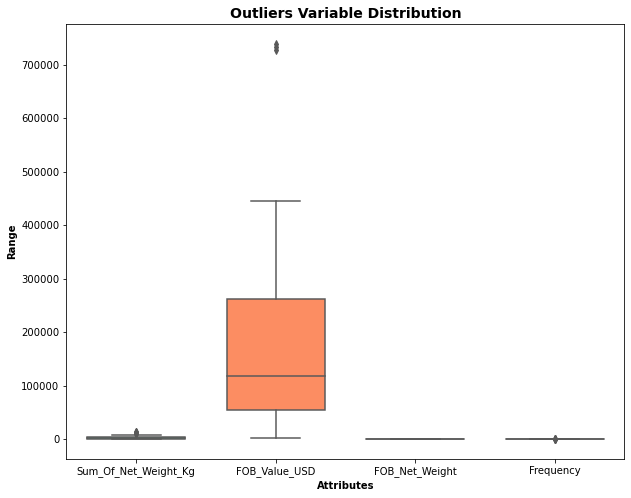

In [15]:
attributes = ['Sum_Of_Net_Weight_Kg', 'FOB_Value_USD', 'FOB_Net_Weight', 'Frequency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [16]:
# Removing (statistical) outliers for Monetary
Q1 = rfm.Sum_Of_Net_Weight_Kg.quantile(0.05)
Q3 = rfm.Sum_Of_Net_Weight_Kg.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Sum_Of_Net_Weight_Kg >= Q1 - 1.5*IQR) & (rfm.Sum_Of_Net_Weight_Kg <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for FOB_Net_Weight
Q1 = rfm.FOB_Net_Weight.quantile(0.05)
Q3 = rfm.FOB_Net_Weight.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.FOB_Net_Weight >= Q1 - 1.5*IQR) & (rfm.FOB_Net_Weight <= Q3 + 1.5*IQR)]


# Removing (statistical) outliers for FOB_Value_USD
Q1 = rfm.FOB_Value_USD.quantile(0.05)
Q3 = rfm.FOB_Value_USD.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.FOB_Value_USD >= Q1 - 1.5*IQR) & (rfm.FOB_Value_USD <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [17]:
# Rescaling Atribute
rfm_df = rfm[['Sum_Of_Net_Weight_Kg','FOB_Value_USD', 'FOB_Net_Weight', 'Frequency']]
# Instantiate
scaler = StandardScaler()
# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(45, 4)

In [18]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Sum_Of_Net_Weight_Kg', 'FOB_Value_USD', 'FOB_Net_Weight', 'Frequency']
rfm_df_scaled.head()

,Sum_Of_Net_Weight_Kg,FOB_Value_USD,FOB_Net_Weight,Frequency
0,1.024053,0.940215,-0.653690,1.535002
1,-0.690045,-0.700539,0.098301,-0.579542
2,1.595419,1.432386,-0.931900,0.830154
3,0.167004,-0.017435,-1.786214,-0.579542
4,-0.118679,-0.222366,-1.315085,-0.579542


In [19]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

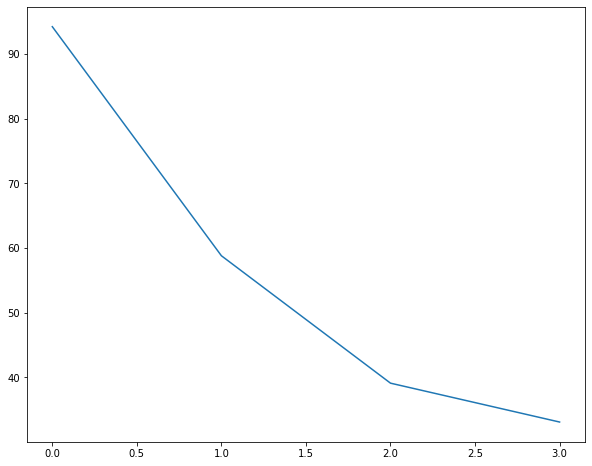

In [20]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [21]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4]
for num_clusters in range_n_clusters:
    
    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5294560847810323
For n_clusters=3, the silhouette score is 0.48613668868383453
For n_clusters=4, the silhouette score is 0.5118436909714555


In [22]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [23]:
# Assign the label
# rfm.to_csv (r'D:\DATA ANALYST\export_dataframe.csv', index = False, header=True)
rfm['Cluster_Id'] = kmeans.labels_
rfm.to_excel (r'D:\DATA ANALYST\Hasil_Cluster_IMPORTER_INDIA.xlsx', sheet_name='FULL', index = False)
rfm

,Importer,Sum_Of_Net_Weight_Kg,FOB_Value_USD,FOB_Net_Weight,Frequency,Cluster_Id
0,ADITI INTERNATIONAL,7000.0,355238.53,51.009633,4,0
1,AQUILA ORGANICS PVT.LTD.,1000.0,55000.00,55.000000,1,1
2,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LIMITED,9000.0,445300.00,49.533333,3,0
3,ASSOCIATE ALLIED CHEMICALS (INDIA) PVT. LTD.,4000.0,180000.00,45.000000,1,1
4,ASSOCIATE ALLIED CHEMICALS INDIA PVT.LTD,3000.0,142500.00,47.500000,1,1
5,DARSHAN INTERNATIONAL,2000.0,103260.00,51.630000,2,1
6,DHARAM PAL PREM CHAND LTD,2400.0,146400.00,61.000000,1,2
7,EASTERN AGENCIES AROMATICS PVT.LTD.,4000.0,261000.00,65.250000,2,2
8,FIRMENICH AROMATICS PRODUCTION (INDIA) PRIVATE...,1850.0,113024.00,65.316389,2,2
9,FIRMENICH AROMATICS PRODUCTION (INDIA) PVT. LTD.,5580.0,326733.00,58.469286,4,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='Sum_Of_Net_Weight_Kg'>

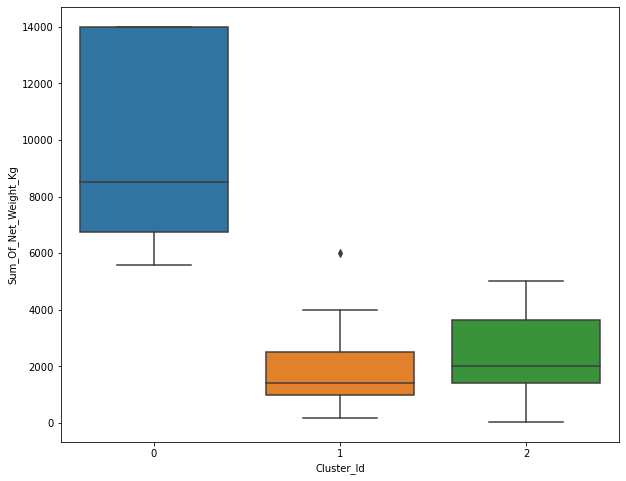

In [24]:
# Boxplot untuk memvisualisasikan Cluster Id dan Monetary
sns.boxplot(x='Cluster_Id', y='Sum_Of_Net_Weight_Kg', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='FOB_Value_USD'>

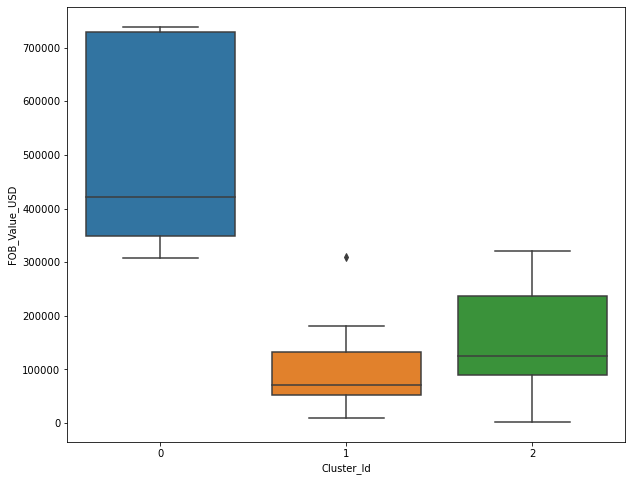

In [25]:
# Boxplot untuk memvisualisasikan Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='FOB_Value_USD', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='FOB_Net_Weight'>

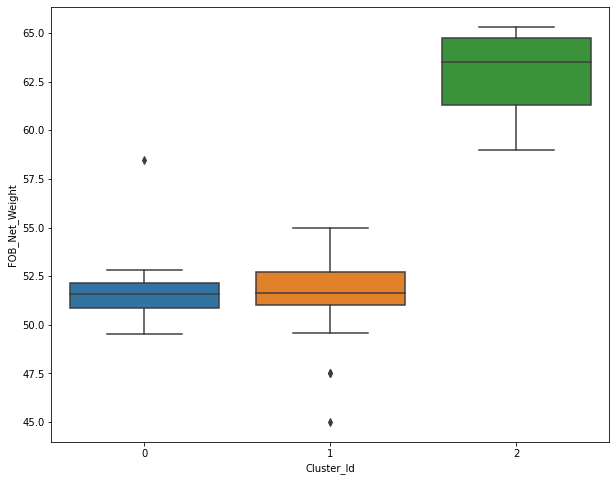

In [26]:
# Boxplot untuk memvisualisasikan Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='FOB_Net_Weight', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

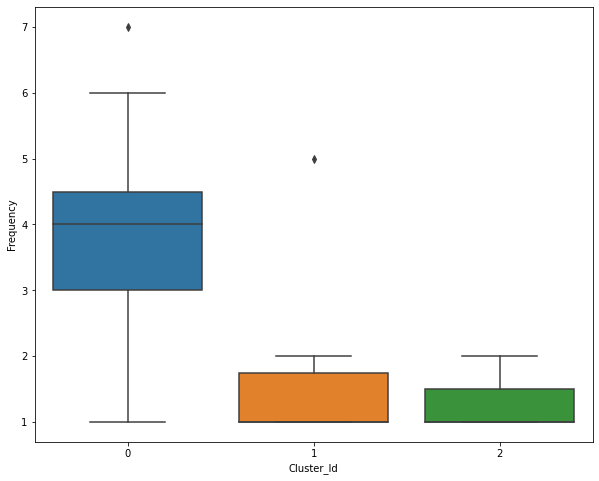

In [27]:
# Boxplot untuk memvisualisasikan Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)